In [266]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [ ]:
ADDDDDDDDDDDDDDDDD

In [322]:
df = pd.read_csv("data-assignment-1.csv")
df
# df = pd.read_csv('data-countries.csv', parse_dates=['payment_date'])

,date,country,total_revenue
0,2007-02-15,Netherlands,7.99
1,2007-02-16,Netherlands,1.99
2,2007-02-16,Netherlands,7.99
3,2007-02-19,Netherlands,2.99
4,2007-02-20,Netherlands,7.99
...,...,...,...
14591,2007-05-14,South Korea,2.99
14592,2007-05-14,Germany,0.99
14593,2007-05-14,United Kingdom,4.99
14594,2007-05-14,Philippines,0.99


In [268]:
df.sort_values('date', inplace=True)

In [269]:
countries = ['Canada', 'United States', 'Turkey']

In [270]:
filtered_data = df[df['country'].isin(countries)]

In [271]:
locale_zone = filtered_data.groupby(['date', 'country'])['total_revenue'].sum()
locale_zone

date        country      
2007-02-14  United States      2.99
2007-02-15  Canada             6.97
            Turkey            11.95
            United States     68.80
2007-02-16  Canada             4.98
                              ...  
2007-04-30  Turkey           118.72
            United States    333.24
2007-05-14  Canada             3.98
            Turkey            10.97
            United States     28.89
Name: total_revenue, Length: 91, dtype: float64

In [272]:
locale_zone = locale_zone.reset_index()
locale_zone

,date,country,total_revenue
0,2007-02-14,United States,2.99
1,2007-02-15,Canada,6.97
2,2007-02-15,Turkey,11.95
3,2007-02-15,United States,68.80
4,2007-02-16,Canada,4.98
...,...,...,...
86,2007-04-30,Turkey,118.72
87,2007-04-30,United States,333.24
88,2007-05-14,Canada,3.98
89,2007-05-14,Turkey,10.97


In [273]:
pivot_df = locale_zone.pivot(index='date', columns='country', values='total_revenue')

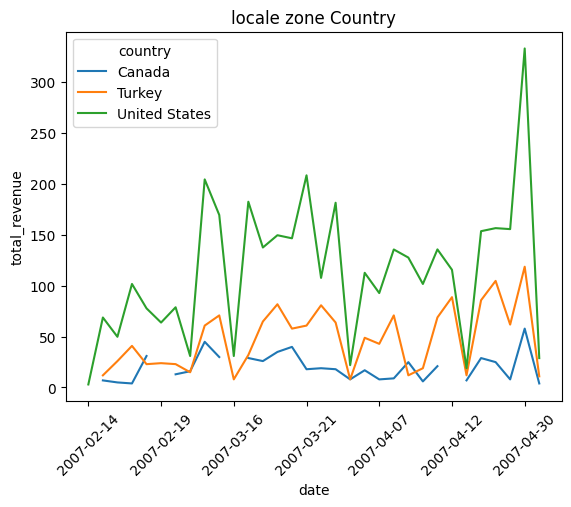

In [274]:
pivot_df.plot()
plt.xlabel('date')
plt.ylabel('total_revenue')
plt.title('locale zone Country')
plt.xticks(rotation=45)
plt.show()

In [275]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jaber\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [276]:
sid = SentimentIntensityAnalyzer()

In [325]:

df=pd.read_csv("data-assignment-2.csv")
df

,title,description
0,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...
1,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...
2,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...
3,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...
4,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...
...,...,...
995,Young Language,A Unbelieveable Yarn of a Boat And a Database ...
996,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...
997,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...
998,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...


In [278]:
df['sentiment'] = df['description'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [279]:
df['sentiment_classification'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

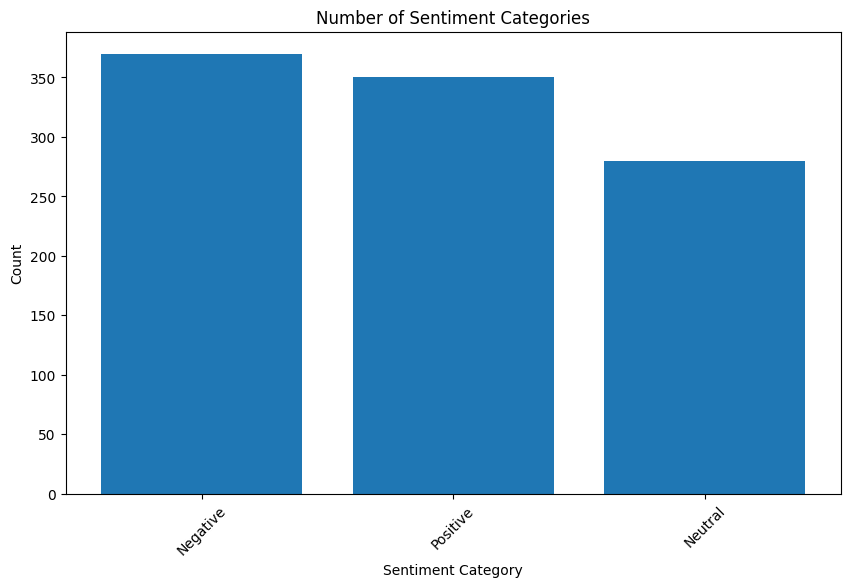

In [280]:
sentiment_category_counts = df['sentiment_classification'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(sentiment_category_counts.index, sentiment_category_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.title('Number of Sentiment Categories')

plt.xticks(rotation=45)

plt.show()

In [327]:
df=pd.read_csv("data-assignment-3.csv")
df

,country,store_id,sum
0,Argentina,1,950.72
1,Brazil,1,1576.35
2,Brazil,2,1342.84
3,China,1,2779.25
4,China,2,2471.78
5,Germany,1,513.79
6,India,2,2224.63
7,India,1,3810.15
8,Indonesia,2,753.24
9,Indonesia,1,599.45


In [282]:
grouped_data = df.groupby('store_id')

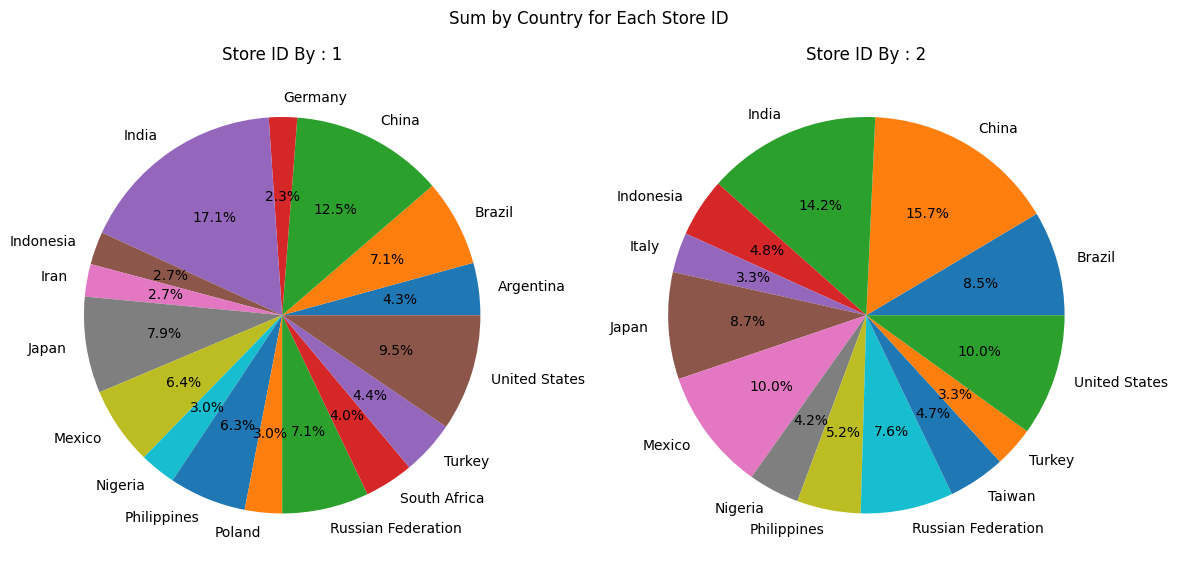

In [288]:


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, (store_id, store_data) in enumerate(grouped_data):
    ax = axes[i]

    country_sum = store_data.groupby('country')['sum'].sum()

    ax.pie(country_sum, labels=country_sum.index, autopct='%1.1f%%')
    ax.set_title('Store ID By : {}'.format(store_id))

fig.suptitle('Sum by Country for Each Store ID')
plt.tight_layout()
plt.show()

In [329]:
df=pd.read_csv("data-assignment-4.csv")
df

,actor_name,revenue
0,Jayne Neeson,1749.48
1,Kenneth Hoffman,1678.81
2,Lucille Dee,1608.61
3,Renee Ball,1875.47
4,Adam Hopper,1365.61
...,...,...
194,Scarlett Bening,1582.67
195,Matthew Leigh,1791.29
196,Carmen Hunt,1486.26
197,Grace Mostel,1892.57


In [292]:
sorted_data = df.sort_values(by='revenue', ascending=False)

In [293]:
top_actors = sorted_data.head(10)[['actor_name', 'revenue']]
top_actors

,actor_name,revenue
101,Susan Davis,3193.49
184,Gina Degeneres,3129.17
155,Matthew Carrey,2543.78
6,Mary Keitel,2426.92
135,Scarlett Damon,2403.81
98,Walter Torn,2403.18
117,Henry Berry,2392.36
103,Christian Akroyd,2378.97
145,Angela Witherspoon,2357.11
157,Cameron Zellweger,2322.94


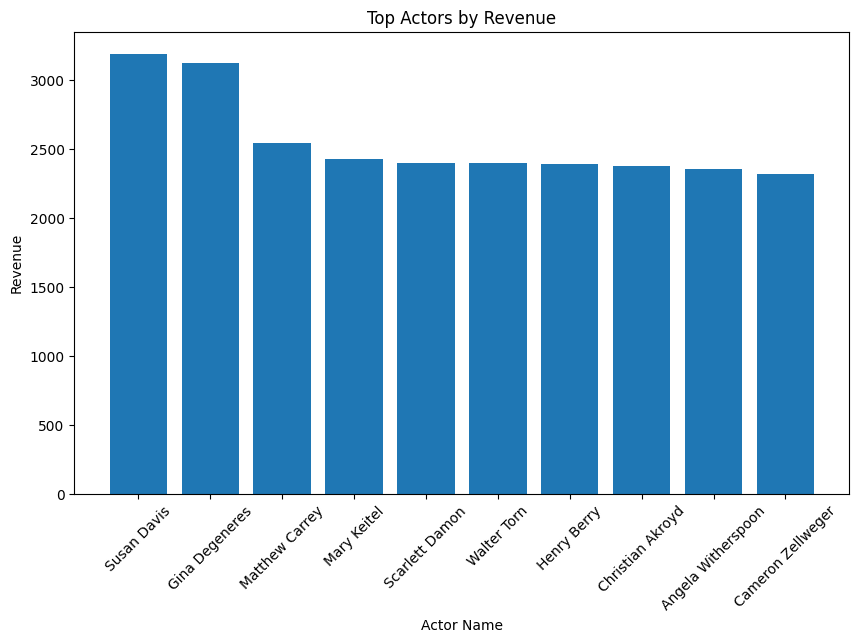

In [294]:
actor_names = top_actors['actor_name']
revenues = top_actors['revenue']


plt.figure(figsize=(10, 6))
plt.bar(actor_names, revenues)
plt.xlabel('Actor Name')
plt.ylabel('Revenue')
plt.title('Top Actors by Revenue')
plt.xticks(rotation=45)

plt.show()

In [317]:
df5 = pd.DataFrame({
    'country': ['Argentina', 'Australia', 'Bolivia', 'Brazil', 'Canada', 'Chile','Colombia' ,'Dominican Republic' , 'Ecuador','Mexico' ,'Nauru' ,'New Zealand', 'Paraguay','Peru' ,'Tonga' ],
    'continent': ['South America', 'Oceania', 'South America', 'South America', 'North America', 'South America', 'South America', 'North America','South America' ,'North America' ,'Oceania' ,'Oceania' ,'South America','South America' ,'Oceania']
})

In [318]:
df5

,country,continent
0,Argentina,South America
1,Australia,Oceania
2,Bolivia,South America
3,Brazil,South America
4,Canada,North America
5,Chile,South America
6,Colombia,South America
7,Dominican Republic,North America
8,Ecuador,South America
9,Mexico,North America


In [331]:
df6=pd.read_csv("data-assignment-6.csv")

In [320]:
merged_data = pd.merge(df5, df6, on='country', how='left')
print(merged_data.head(9))

              country      continent  country_id          last_update
0           Argentina  South America           6  2006-02-15 09:44:00
1           Australia        Oceania           8  2006-02-15 09:44:00
2             Bolivia  South America          14  2006-02-15 09:44:00
3              Brazil  South America          15  2006-02-15 09:44:00
4              Canada  North America          20  2006-02-15 09:44:00
5               Chile  South America          22  2006-02-15 09:44:00
6            Colombia  South America          24  2006-02-15 09:44:00
7  Dominican Republic  North America          27  2006-02-15 09:44:00
8             Ecuador  South America          28  2006-02-15 09:44:00
